<a href="https://colab.research.google.com/github/mtharruda/spotipy_analise/blob/main/analiseDISCO_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Código por Matheus Arruda`

Código para analisar atributos musicais, como valência, energia, "dançabilidade", tempo, etc (leia mais abaixo) de discos. Para a tarefa, utiizamos a bibliotecas spotipy para extrair dados da API do Spotify.


**Documentação**
> https://spotipy.readthedocs.io/en/2.22.1/

> https://developer.spotify.com/documentation/web-api/reference/get-audio-features



*Exemplo de análise no fim do notebook*



# Preparando o ambiente
Vamos, primeiramente, importar nossas bibliotecas. Para a análise, utilizaremos


1.   [Pandas](https://pandas.pydata.org/docs/)
2.   [Matplotlib](https://matplotlib.org/stable/index.html)
3.   [Numpy](https://numpy.org/doc/)
4.   [Spotipy](https://spotipy.readthedocs.io/en/2.24.0/)
5.   [Seaborn](https://seaborn.pydata.org/)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#Precisamos baixar a biblioteca do spotipy e, então, importá-la ao nosso ambiente
pip install git+https://github.com/plamere/spotipy.git --upgrade

  Cloning https://github.com/plamere/spotipy.git to /tmp/pip-req-build-bi_udkm1
  Running command git clone --filter=blob:none --quiet https://github.com/plamere/spotipy.git /tmp/pip-req-build-bi_udkm1
  Resolved https://github.com/plamere/spotipy.git to commit e153dabe7c90c4777ff39054dbc897b19fb1a13d
  Preparing metadata (setup.py) ... done


In [ ]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

# **Estabelecer conexão com API do Spotify**

Antes de iniciarmos, precisamos do **client** **id** e **client secret** do Spotify.
Essas credenciais são necessárias para estabelecermos a conexão com a API e requisitar os dados

##Como fazer
Primeiro,

1.   Acesse: https://developer.spotify.com/dashboard;
2.   Clique em **"CREATE APP"**;
3.   Nomeie o aplicativo como desejar;
4.   Faça uma descrição do aplicativo;
5.   Na caixa **Redirect URI**, devemos inserir o endereço "http://localhost:3000";
6.   Clique em **save**.

Com o app criado, vamos abri-lo e clicar em **settings/configuração** (na parte superior esquerda da tela). É nesta página onde encontraremos nosso **client id** e **client secret**

In [ ]:
# !Declaração do id, senha e token para autorização!
client_id= "" #Aqui, o usuário deve informar o id da conta spotify
client_secret= "" # Inserir token de segurança
redirect_uri="http://localhost:3000/"

In [ ]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

In [ ]:
artist_id = "" #Aqui vamos inserir o ID do artista

# Importando os dados 🎲

In [ ]:
#Raspando os discos do artista
discos = sp.artist_albums(artist_id, album_type="album", country="BR", offset=0)

In [ ]:
#Aqui, vamos separar as informações de cada disco em uma lista
albuns = discos['items']

In [ ]:
#Vamos montar uma tabela com base nas informações contidas na lista que crimamos anteriormente
df_discos = pd.DataFrame(data=albuns)
df_discos

In [ ]:
#Vamos derrubar as colunas para melhor visualização do dataframe
df_discos.drop(columns=['album_group','external_urls','href','type'], inplace=True)

In [ ]:
#Transformando a coluna id de df_discos em lista para buscarmos todas as faixas
albums_ids = df_discos['id'].to_list()
albums_ids

In [ ]:
#Com o id do disco selecionado, vamos buscar na API informações de cada faixa
tracks = (sp.album_tracks("67f6SSb8yKduNCK15DsafC", market="BR"))

In [ ]:
#Com o resultado anterior, criamos um dataframe
musicas = tracks['items']
musicas = pd.DataFrame(data=musicas)
musicas[['sp','s1','id_track']] = (musicas['uri'].str.split(':', expand = True))
musicas

In [ ]:
analise_tracks = sp.audio_features(tracks=musicas['id_track'])
analise_tracks = pd.DataFrame(data=analise_tracks)
analise_tracks

In [ ]:
#Aqui vamos juntar os títulos de cada música com seu id respectivo
analise = pd.merge(analise_tracks, musicas, on = 'id', how = 'outer')
analise

In [ ]:
analise.describe()

In [ ]:
analise.groupby(by = "name").valence.describe()

# Plotagem dos dados - exemplos



[Text(0.5, 0, 'tristeza - positividade'),
 Text(0, 0.5, 'Música'),
 Text(0.5, 1.0, 'Análise de sentimento')]

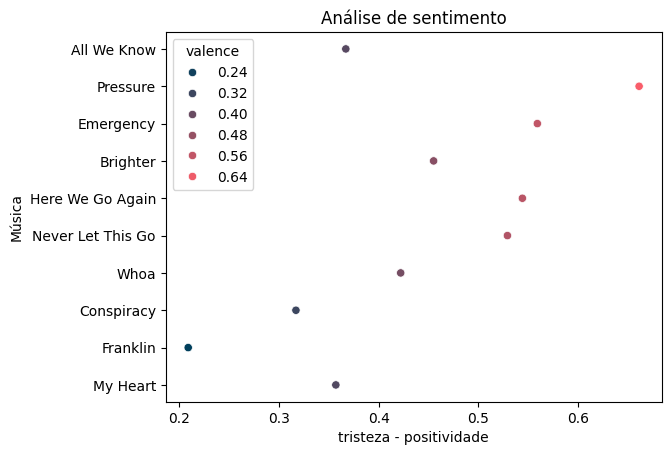

In [ ]:
ax = sns.scatterplot(data = analise, x = "valence", y = "name", hue = "valence", palette="blend:#003f5c,#f95d6a")
ax.set(xlabel='tristeza - positividade',
       ylabel='Música',
       title='Análise de sentimento')

In [ ]:
ax = sns.scatterplot(data = analise, x = "energy", y = "name", hue = "valence", palette="blend:#003f5c,#f95d6a")
ax.set(xlabel='Energia',
       ylabel='Música',
       title='Energia da música')

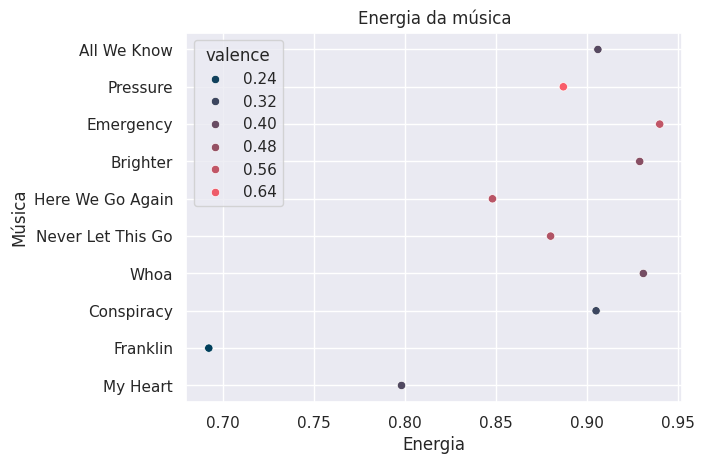

In [ ]:
ax = sns.scatterplot(data = analise, x = "danceability", y = "name", hue = "valence", palette="blend:#003f5c,#f95d6a")
ax.set(xlabel='Dançabilidade',
       ylabel='Música',
       title='Quão dançável é a música?')

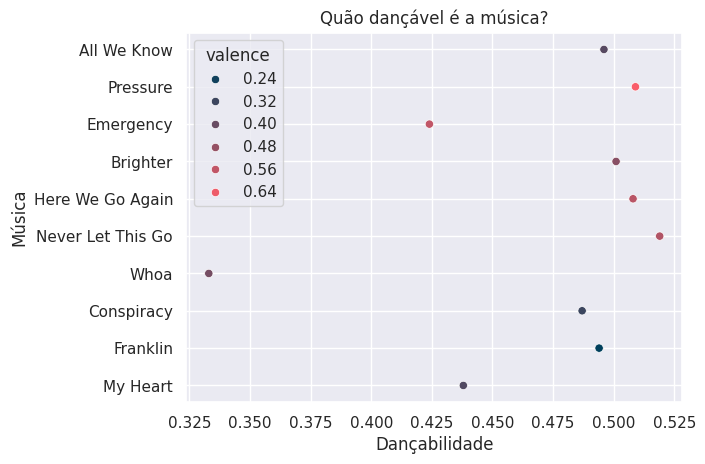

In [ ]:
#Como o disco se comporta ao longo da reprodução?
plt.figure(figsize=(20,8))
plt.xticks(rotation=0)
sns.lineplot(data=analise, x='name', y='valence', color='gray')
plt.show()

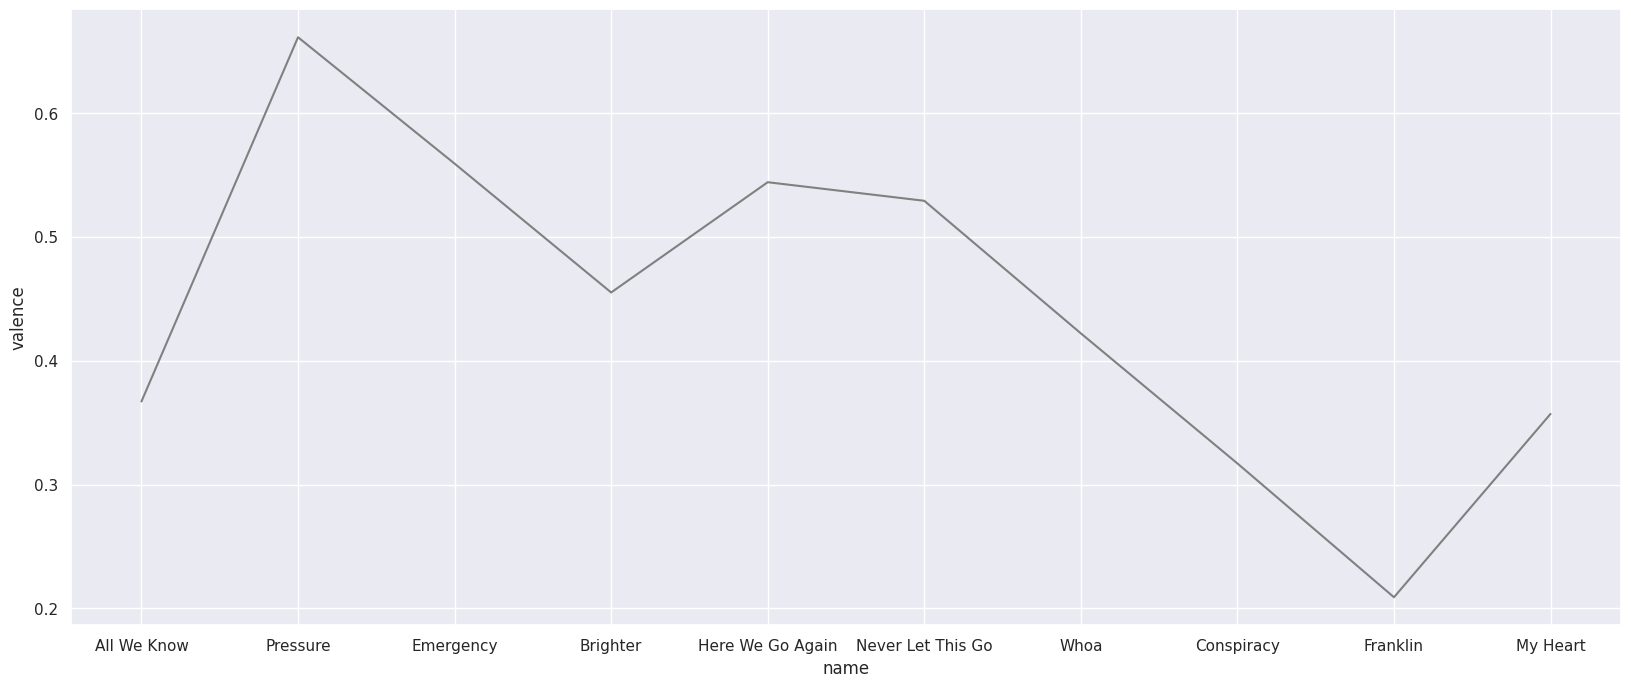

**Heatmap**

Para criar um heatmap, precisamos passar todos os atributos (valence, energ, danceability) para duas colunas contendo: tipo de atributo e valor do atributo.

In [ ]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=0)
sns.set_theme(style="darkgrid")

hmap = heat_dados.pivot(index = "atribute", columns = "name", values = "value")
sns.heatmap(hmap, annot = True,  linewidth=.5, cmap="mako")

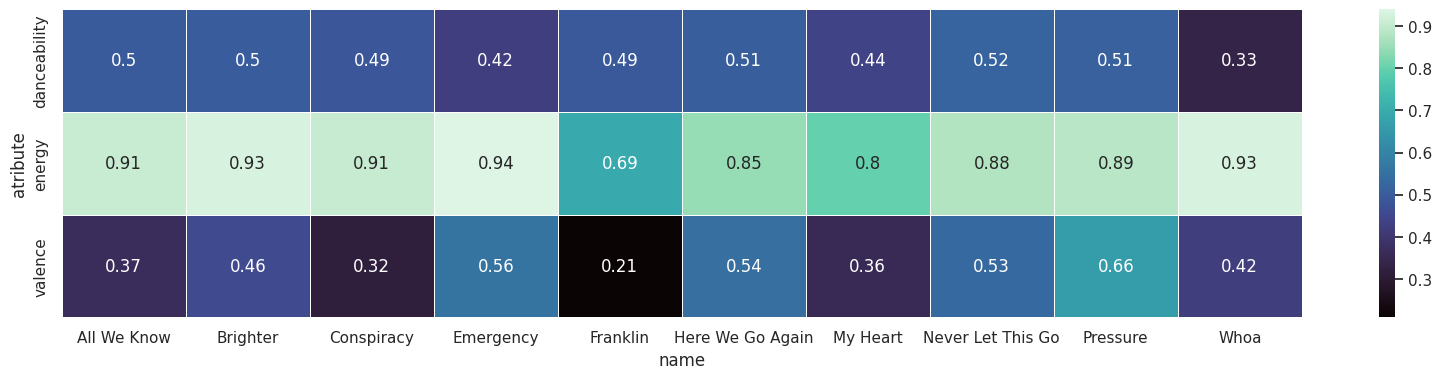

In [ ]:
plt.figure(figsize=(4,6))
plt.xticks(rotation=0)
sns.set_theme(style="darkgrid")

hmap = heat_dados.pivot(index = "name", columns = "atribute", values = "value")
sns.heatmap(hmap, annot = True,  linewidth=.5, cmap="mako")

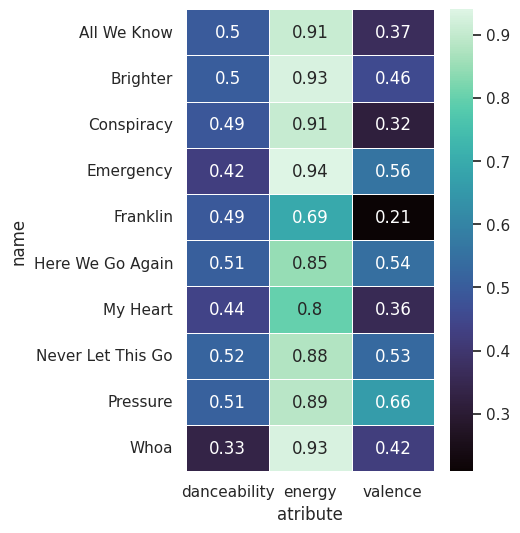